Tutorial followed: https://www.youtube.com/watch?v=kSqxn6zGE0c

### Prerequisites
1. Check Python installation version (idk which one works, i use 3.11 during coding :p)

2. Install required packages via terminal: ```pip install -r requirements.txt```

In [1]:
# Image Preparation Imports
import cv2
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
from glob import glob
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

file_name = '../data/wiki.mat'

def matlab_datenum_to_date(matlab_dn):
    return datetime.date.fromordinal(int(matlab_dn) - 366)

def compute_wiki_age(photo_year, birth_datenum):
    photo_date = datetime.date(photo_year, 7, 1)
    birth_date = matlab_datenum_to_date(birth_datenum)
    delta = photo_date - birth_date
    return delta.days / 365.2425


def process_matfile(file_name):
    # Load the data
    data = loadmat(file_name)['wiki'][0, 0]
    data_dict = {key: data[key] for key in data.dtype.names}

    # Convert data into filename-based dictionary
    filename_dict = {}

    for i in range(len(data_dict['full_path'][0])):
        # Remove invalid faces
        if np.isinf(data_dict['face_score'][0][i]) or not np.isnan(data_dict['second_face_score'][0][i]):
            continue

        filename = data_dict['full_path'][0][i][0]
#         filename_dict[filename] = {
#             # 'dob': data_dict['dob'][0][i],
#             # 'photo_taken': data_dict['photo_taken'][0][i],
#             # 'gender': data_dict['gender'][0][i],
#             # 'name': data_dict['name'][0][i],
#             # 'face_location': data_dict['face_location'][0][i],
#             # 'face_score': data_dict['face_score'][0][i],
#             # 'second_face_score': data_dict['second_face_score'][0][i],
#             'approx_age': compute_wiki_age(data_dict['photo_taken'][0][i], data_dict['dob'][0][i])
#         }
        filename_dict[filename] = compute_wiki_age(data_dict['photo_taken'][0][i], data_dict['dob'][0][i])

    return filename_dict

# Load filenames anda ssociated data
data = process_matfile(file_name)


In [2]:
#some data cleaning to get rid of excessively large or negative values in the predicted age category
print(len(data))
mean_val = sum(data.values()) / len(data)
print(mean_val)
for key in list(data.keys()):
    if data[key] > 100 or data[key] < 1:
        del data[key]
print(len(data))
print(min(data.values()), max(data.values()))

40216
38.60996556567274
40147
1.3525260614523227 99.87337180092678


In [3]:
# Load in images
images = []
for i in data.keys():  
    img = cv2.imread('../data/wiki_crop/'+i)
    images.append(img)

In [4]:
#create classification for y variable (can make more categories, just put this in for now)
classifications = []
for key in data.keys():
    if data[key] > mean_val:
        classifications.append('older')
    else:
        classifications.append('younger')

## *Resizing Examples* ##

In [5]:
#resizing images examples
im2 = cv2.resize(images[2], (200,200), interpolation=cv2.INTER_LINEAR)
im0 = cv2.resize(images[0], (200,200), interpolation=cv2.INTER_LINEAR)

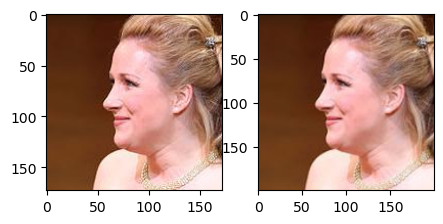

In [7]:
# scaled up to 200x200
plt.figure(figsize=[5,5])
plt.subplot(121);plt.imshow(images[2][:,:,::-1])
plt.subplot(122);plt.imshow(im2[:,:,::-1])

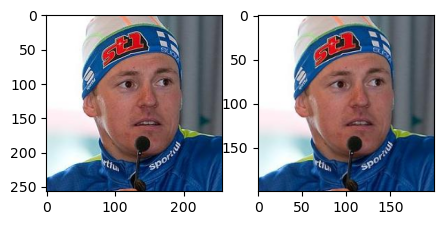

In [8]:
# scaled down to 200x200
plt.figure(figsize=[5,5])
plt.subplot(121);plt.imshow(images[0][:,:,::-1])
plt.subplot(122);plt.imshow(im0[:,:,::-1])

## end of examples ##

In [9]:
#resize all images (can change width and height to what we find to be best)
new_images = []
width = 200
height = 200
for image in images:
    new_im = cv2.resize(image, (width,height), interpolation=cv2.INTER_LINEAR)
    new_images.append(new_im)

In [10]:
# split in to train and test sets
x_train, x_test, y_train, y_test = train_test_split(new_images, classifications, test_size = 0.8, random_state = 1)

In [ ]:
# Reading in images
glob()


TypeError: glob() missing 1 required positional argument: 'pathname'

In [ ]:

img_mpl = plt.imread()

img_cv2 = cv2.imread()




TypeError: imread() missing 1 required positional argument: 'fname'

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(img_mpl)
